Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks?

Answer:A Convolutional Neural Network (CNN) is a deep learning model specifically designed for processing grid-like data such as images. Unlike fully connected neural networks, CNNs use convolutional layers with shared weights and local connectivity, enabling them to efficiently capture spatial hierarchies like edges, textures, and shapes. CNNs significantly reduce the number of parameters, improve translation invariance, and achieve superior performance on image data compared to fully connected networks.

Question 2: Discuss the architecture of LeNet-5 and its contribution to modern deep learning.

Answer:LeNet-5 is an early CNN architecture proposed by Yann LeCun in 1998 for handwritten digit recognition. It consists of convolutional layers, average pooling layers, and fully connected layers. LeNet-5 introduced key concepts such as local receptive fields, shared weights, and subsampling. Its original paper, “Gradient-Based Learning Applied to Document Recognition” (LeCun et al., 1998), laid the foundation for modern CNNs used in computer vision today.

Question 3: Compare AlexNet and VGGNet.

Answer:AlexNet introduced deep CNNs with ReLU activations, dropout, and GPU acceleration, achieving a breakthrough in ImageNet performance. It uses large filters in early layers and has around 60 million parameters. VGGNet focuses on simplicity by using uniform 3×3 filters and deeper architectures, resulting in better feature extraction but significantly more parameters and computational cost. AlexNet is faster, while VGGNet provides stronger representational power.

Question 4: What is transfer learning in image classification?

Answer:Transfer learning involves using a pre-trained CNN model trained on a large dataset and adapting it to a new task. It reduces computational cost and improves performance when labeled data is limited by reusing learned low-level and mid-level features such as edges and textures. Fine-tuning higher layers enables effective learning on small datasets.

Question 5: Describe the role of residual connections in ResNet.

Answer:Residual connections allow gradients to flow directly through identity shortcuts, preventing vanishing gradients in very deep networks. By learning residual mappings instead of direct mappings, ResNet enables effective training of extremely deep CNNs and significantly improves accuracy and convergence stability.

In [3]:
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

start = time.time()

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Pad images from 28x28 to 32x32 (LeNet-5 requirement)
X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), mode='constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), mode='constant')

# Reshape
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

# LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', input_shape=(32,32,1)),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", acc)
print("Training Time:", time.time() - start)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8722 - loss: 0.4367 - val_accuracy: 0.9678 - val_loss: 0.1070
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9680 - loss: 0.1060 - val_accuracy: 0.9783 - val_loss: 0.0716
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9800 - loss: 0.0648 - val_accuracy: 0.9812 - val_loss: 0.0646
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9857 - loss: 0.0453 - val_accuracy: 0.9845 - val_loss: 0.0574
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9845 - val_loss: 0.0543
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9784 - loss: 0.0685
Test Accuracy: 0.9824000000953674
Training Time: 204.4730567932129


In [6]:
#Question 7: Transfer learning with VGG16


# STEP 1: Create dataset directory with dummy images
import os
import numpy as np
from PIL import Image

os.makedirs("dataset/class0", exist_ok=True)
os.makedirs("dataset/class1", exist_ok=True)

for i in range(10):
    img0 = Image.fromarray((np.random.rand(224,224,3) * 255).astype("uint8"))
    img1 = Image.fromarray((np.random.rand(224,224,3) * 255).astype("uint8"))
    img0.save(f"dataset/class0/img_{i}.jpg")
    img1.save(f"dataset/class1/img_{i}.jpg")

print("Dataset created successfully")

# STEP 2: Transfer learning with VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    "dataset",
    target_size=(224,224),
    batch_size=4,
    class_mode="categorical"
)

model.fit(train_data, epochs=3)


Dataset created successfully
Found 20 images belonging to 2 classes.
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4896 - loss: 2.3346
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2493 - loss: 1.3186
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4215 - loss: 0.8148


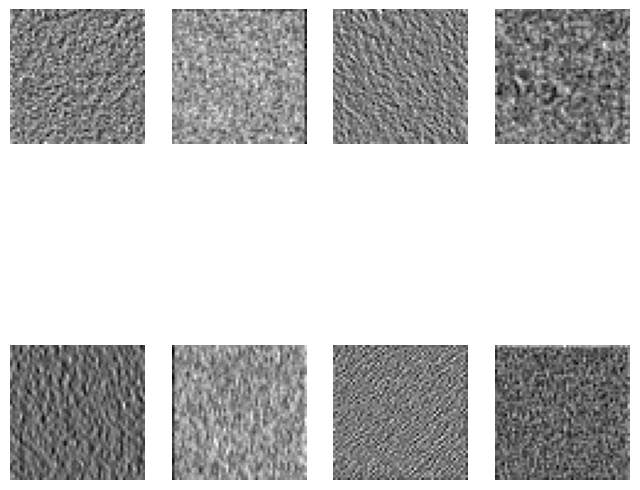

In [9]:
#Question 8: Visualize AlexNet filters and feature maps
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models import AlexNet_Weights
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# STEP 1: Create a sample image if it does not exist
if not os.path.exists("sample.jpg"):
    img = Image.fromarray((np.random.rand(224,224,3) * 255).astype("uint8"))
    img.save("sample.jpg")

# STEP 2: Load AlexNet with new weights API
alexnet = models.alexnet(weights=AlexNet_Weights.DEFAULT)
alexnet.eval()

# STEP 3: Load and preprocess image
img = Image.open("sample.jpg").convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
input_img = transform(img).unsqueeze(0)

# STEP 4: Extract feature maps from first convolutional layer
with torch.no_grad():
    feature_maps = alexnet.features[0](input_img)

# STEP 5: Visualize first 8 feature maps
plt.figure(figsize=(8,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(feature_maps[0,i].numpy(), cmap='gray')
    plt.axis('off')

plt.show()


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 159s 443ms/step - accuracy: 0.1883 - loss: 2.1537 - val_accuracy: 0.2954 - val_loss: 1.8932
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 156s 444ms/step - accuracy: 0.3123 - loss: 1.8515 - val_accuracy: 0.3738 - val_loss: 1.7065
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 168s 476ms/step - accuracy: 0.3664 - loss: 1.7061 - val_accuracy: 0.3996 - val_loss: 1.6225
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 190s 442ms/step - accuracy: 0.3968 - loss: 1.6428 - val_accuracy: 0.3880 - val_loss: 1.6253
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 200s 438ms/step - accuracy: 0.4146 - loss: 1.6007 - val_accuracy: 0.4324 - val_loss: 1.5537


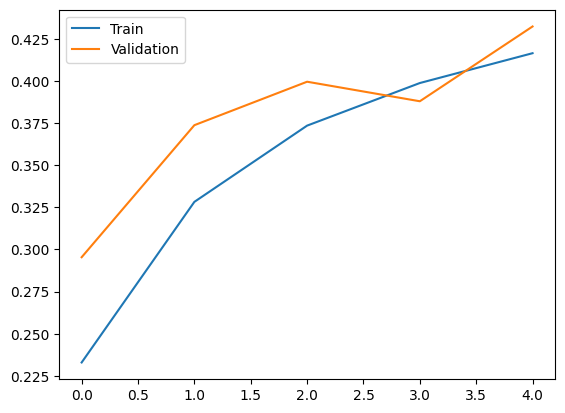

In [2]:
#Question 9: GoogLeNet-style model on CIFAR-10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Mini Inception Block
def inception_block(x):
    b1 = Conv2D(16, (1,1), activation='relu', padding='same')(x)
    b2 = Conv2D(16, (3,3), activation='relu', padding='same')(x)
    b3 = Conv2D(16, (5,5), activation='relu', padding='same')(x)
    return Concatenate()([b1, b2, b3])

# Model
inputs = Input(shape=(32,32,3))
x = inception_block(inputs)
x = MaxPooling2D((2,2))(x)
x = inception_block(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


Question 10: CNN approach for medical X-ray classification

Answer:Given limited labeled medical data, I would use transfer learning with a pre-trained ResNet or Inception model due to their strong generalization ability. Data augmentation and fine-tuning higher layers would be applied to improve performance. Binary or multi-class cross-entropy would be used depending on labels. The trained model would be deployed using a REST API or Streamlit app with GPU support. This approach ensures high accuracy, efficient training, and scalable deployment for clinical environments.